In [2]:
if(!require(install.load)) {install.packages("install.load");
library(install.load)}
install_load("plyr", "dplyr", "tidyr", "readr", "car", "lme4", "lmerTest",
             "ggplot2", "cowplot", "devtools")

# Outline

Move on to an F3 population and look at the importance of population stratification.

An F3 is created by random mating of F2 individuals.  F2 individuals are genetically different from each other, so the F3 generation typically has family structure (sets of siblings sharing the same parents).  This phenomenon is generally called population stratification.  It is important because individuals with correlated phenotypes have correlated genotypes due to relatedness.  Treating them as independent leads to a form of pseudoreplication. 
 
We can start by running the null model for a set of simulated markers to see how the analysis performs with a true null hypothesis. Do we get the right number of false positives?  

We can also try to run this model by randomizing either genotypes and phenotypes, while ignoring the structure of the population (so we ignore family).  Do we get the same significance results?  

We can account for the influence of population stratification by including a random effect term that accounts for family.  This is basically the same as running the variance component model, so we are fitting the family variance component as a random effect while fitting the fixed effect of a locus. This same approach could be done in a more complex population by using an animal model to fit the family variance component. 

We can now go back and run the null model with simulated markers and look at how including the family covariance parameter changes the behaviour of the model.
 
We can also use this mixed model to simultaneously estimate QTL effects and family variance components, which is a simple version of the structure of a model that is now widely used for mapping loci in natural populations (including for human association studies)

We can also look at whether a locus is pleiotropic and affects multiple traits.

# Population stratification

An F3 population has more recombination, which means you get higher resolution, but your model is more complex

![](f3pop.png)

# Reading and plotting data

In [3]:
f3_data = read_csv("./F3 geno pheno with QTL effect.csv")
f3_data

Parsed with column specification:
cols(
  .default = col_integer(),
  Sex = col_character(),
  Trait1 = col_double(),
  Trait2 = col_double(),
  Trait3 = col_double(),
  Trait2a = col_double(),
  Trait3a = col_double(),
  Trait3b = col_double()
)
See spec(...) for full column specifications.


ID,FAMILY,Sex,Sire,Dam,NURSE,LSB,LSW,Trait1,Trait2,⋯,G25,G26,G27,G28,G29,G30,G31,Trait2a,Trait3a,Trait3b
492,11,F,82,173,173,8,8,0.08732662,12.511166,⋯,1,1,1,1,1,1,1,12.004366,25.99122,26.66904
493,11,F,82,173,173,8,8,0.09732662,10.522276,⋯,1,1,1,1,1,1,1,10.522276,22.88304,22.88304
494,14,F,85,114,173,7,8,0.09371156,13.818946,⋯,-1,-1,-1,-1,-1,-1,-1,13.312146,26.25022,27.42804
495,14,M,85,114,173,7,8,0.15897373,12.384913,⋯,0,0,0,0,0,1,1,12.891713,30.75996,30.75996
496,11,F,82,173,173,8,8,0.02587000,13.101166,⋯,1,1,1,1,1,1,1,13.607966,31.49486,30.31704
497,14,M,85,114,173,7,8,0.12987749,13.744913,⋯,-1,-1,-1,-1,-1,-1,-1,13.238113,33.92932,35.10714
498,14,M,85,114,173,7,8,0.10240803,13.376023,⋯,-1,-1,0,0,0,0,0,12.869223,33.27632,34.45414
499,11,F,82,173,173,8,8,0.09491825,13.953386,⋯,-1,-1,-1,-1,-1,0,0,13.446586,28.12822,29.30604
500,11,F,82,173,114,8,7,0.09938281,10.617069,⋯,-1,-1,-1,-1,-1,0,0,10.110269,28.59073,29.76855
501,11,M,82,173,114,8,7,0.09229518,10.383046,⋯,0,0,0,0,0,0,0,10.383046,28.14965,28.14965


Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

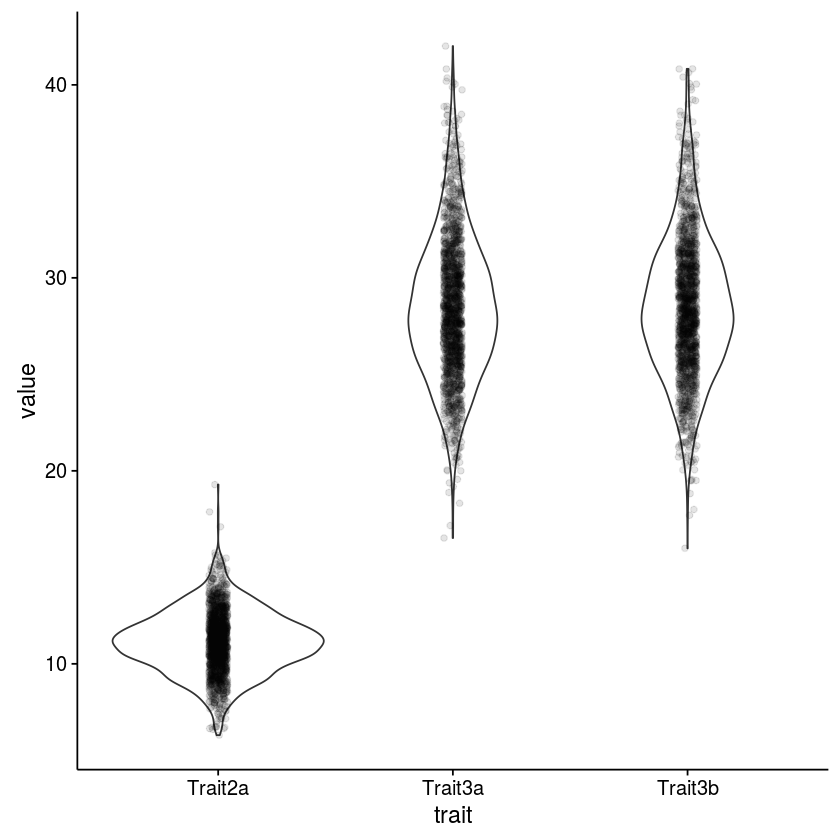

In [11]:
f3_data %>% 
    gather(trait, value, Trait2a:Trait3b) %>%
    ggplot(aes(trait, value)) + geom_violin() + geom_jitter(width = 0.1, alpha = 0.1)

# Mapping gone wrong

Let's see what happens when we use the same model as in the F2 population, using the set of null markers with no effect. 

Remeber, we expect no more than 5% of significant markers in this set.

In [5]:
simulated_genotypes = read_csv("sim genotypes.csv")
f3_data_null = inner_join(select(f3_data, ID:Trait3), simulated_genotypes, by = "ID")
#f3_data_null

Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


In [6]:
n_markers = 675
null_marker_fits_trait3 = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    f3_data_null[[paste0(current_marker, '_D')]] = ifelse(f3_data_null[[current_marker]], 0, 1)
    model_formula = paste0("Trait3 ~ Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    null_marker_fits_trait3[[i]] = lm(as.formula(model_formula), data = f3_data_null)
}

In [7]:
table(laply(null_marker_fits_trait3, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) < 0.05) / n_markers


    FALSE      TRUE 
0.8059259 0.1940741 

Almost four times what we should be getting! Mayby some bootstraping will help?

## Mixed models for stratification

We can take stratification into account using a random effect for family structure. The lme4 and lmerTest packages allow us to fit the model and extract the relevant p-value. The only difference is the (1|FAMILY) term in the model formula.

In [8]:
n_markers = 675
null_marker_mixed_fits_trait3 = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    f3_data_null[[paste0(current_marker, '_D')]] = ifelse(f3_data_null[[current_marker]], 0, 1)
    
    model_formula = paste0("Trait3 ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    null_marker_mixed_fits_trait3[[i]] = lmer(as.formula(model_formula), data = f3_data_null)
}

In [9]:
table(laply(null_marker_mixed_fits_trait3, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) < 0.05) / n_markers


     FALSE       TRUE 
0.94222222 0.05777778 

Much better!

## Mapping pleiotropic QTLs

For more than 1 trait we can fit the models separetly for each trait or run them in a single model.

In [20]:
n_markers = 31
interval = 6 # Play around with this value. 
fl_marker_fits_trait2a = list()
for(i in seq(n_markers)) f3_data[[paste0(paste0('G', i), '_D')]] = ifelse(f3_data[[paste0('G', i)]], 0, 1)
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    model_formula = paste0("Trait2a ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    if((i - interval) >= 1)
        model_formula = paste0(model_formula, "+ G", paste0(i - interval), "+ G", paste0(i - interval), "_D")
    if((i + interval) <= n_markers)
        model_formula = paste0(model_formula, "+ G", paste0(i + interval), "+ G", paste0(i + interval), "_D")
    fl_marker_fits_trait2a[[i]] = lmer(as.formula(model_formula), data = f3_data)
}

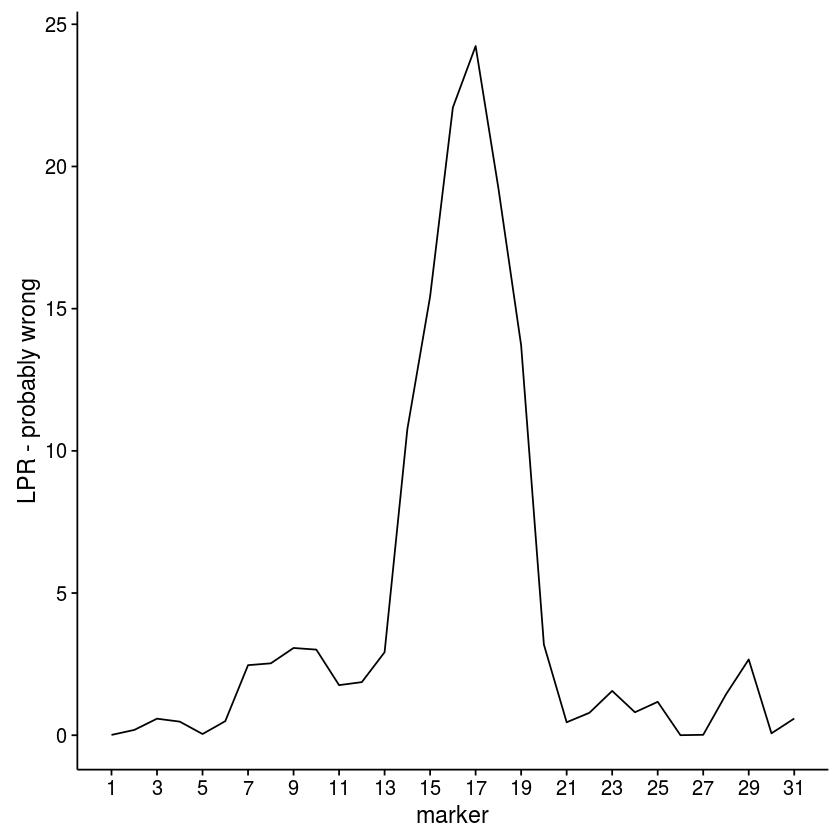

In [21]:
ldply(fl_marker_fits_trait2a, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) %>%
    ggplot(aes(1:n_markers, -log(V1))) + geom_line() + labs(x = "marker", y = "LPR - probably wrong") +
    scale_x_continuous(breaks = seq(1, n_markers, by = 2))

In [23]:
n_markers = 31
interval = 6 # Play around with this value. 
fl_marker_fits_trait3a = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    model_formula = paste0("Trait3a ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    if((i - interval) >= 1)
        model_formula = paste0(model_formula, "+ G", paste0(i - interval), "+ G", paste0(i - interval), "_D")
    if((i + interval) <= n_markers)
        model_formula = paste0(model_formula, "+ G", paste0(i + interval), "+ G", paste0(i + interval), "_D")
    fl_marker_fits_trait3a[[i]] = lmer(as.formula(model_formula), data = f3_data)
}

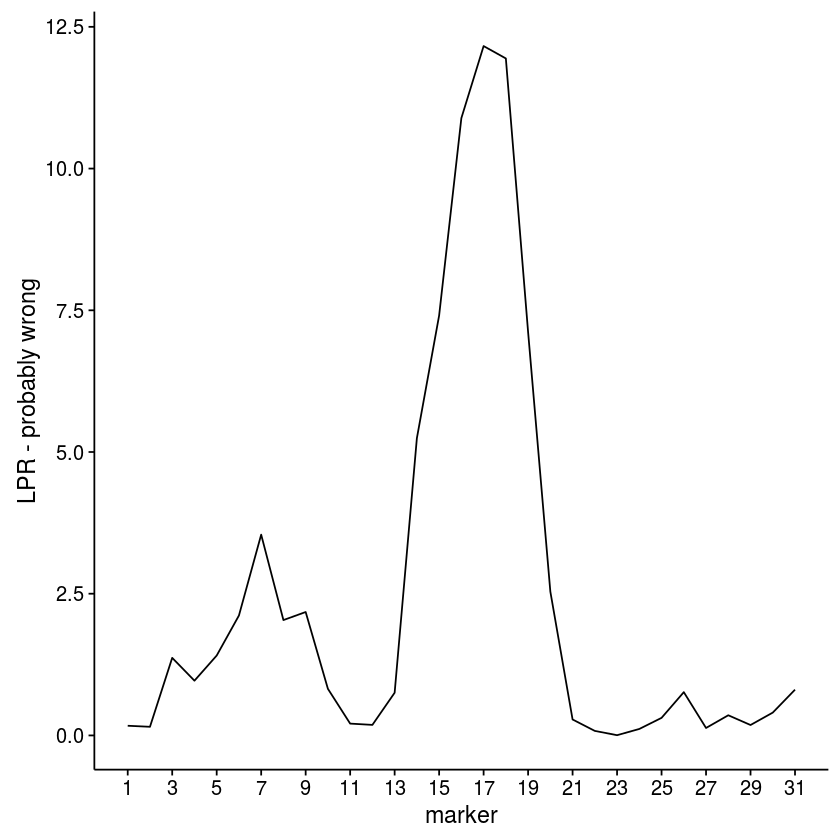

In [24]:
ldply(fl_marker_fits_trait3a, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) %>%
    ggplot(aes(1:n_markers, -log(V1))) + geom_line() + labs(x = "marker", y = "LPR - probably wrong") +
    scale_x_continuous(breaks = seq(1, n_markers, by = 2))